In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_bs_o = pd.read_excel('financial_source.xlsx',sheet_name='Business Segment(Operating)')

In [3]:
df_bs_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               12 non-null     int64  
 1   Operating_Segment  12 non-null     object 
 2   Revenue            12 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 416.0+ bytes


In [4]:
df_bs_o.head()

,Year,Operating_Segment,Revenue
0,2020,E-business activities,440746.25
1,2020,POS,67408.25
2,2020,Other,10370.50
3,2021,E-business activities,584720.37
4,2021,POS,122719.09


In [5]:
filter_year = 2022

filter_df = df_bs_o[df_bs_o['Year'] == filter_year].groupby('Operating_Segment')['Revenue'].sum()
filter_df

Operating_Segment
E-business activities    540418.81
Other                     19533.21
POS                       91154.98
Name: Revenue, dtype: float64

In [6]:
# Calculate the total revenue
total_revenue = filter_df.sum()

# Add a 'percentage' column
filter_df = filter_df.reset_index()  # Reset index to add a new column
filter_df['percentage'] = (filter_df['Revenue'] / total_revenue) * 100

# Output the result
filter_df

,Operating_Segment,Revenue,percentage
0,E-business activities,540418.81,83.0
1,Other,19533.21,3.0
2,POS,91154.98,14.0


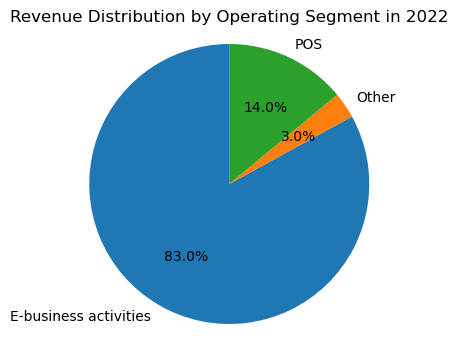

In [7]:
labels = filter_df['Operating_Segment']
percentage = filter_df['percentage']

plt.figure(figsize=(5, 4))
plt.pie(percentage,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Revenue Distribution by Operating Segment in 2022')
plt.axis('equal')
plt.show()

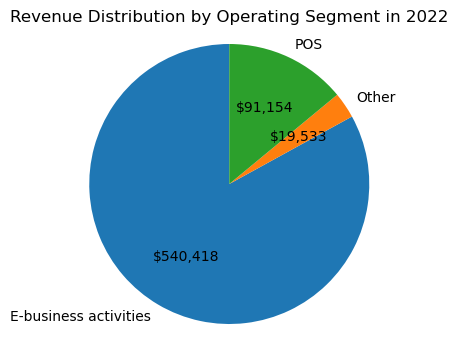

In [8]:
labels = filter_df['Operating_Segment']
revenue = filter_df['Revenue']

def autopct_func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return f"${absolute:,.0f}"  # Format the revenue value with commas

plt.figure(figsize=(5, 4))
plt.pie(revenue,labels=labels,autopct=lambda pct: autopct_func(pct, revenue),startangle=90)
plt.title('Revenue Distribution by Operating Segment in 2022')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

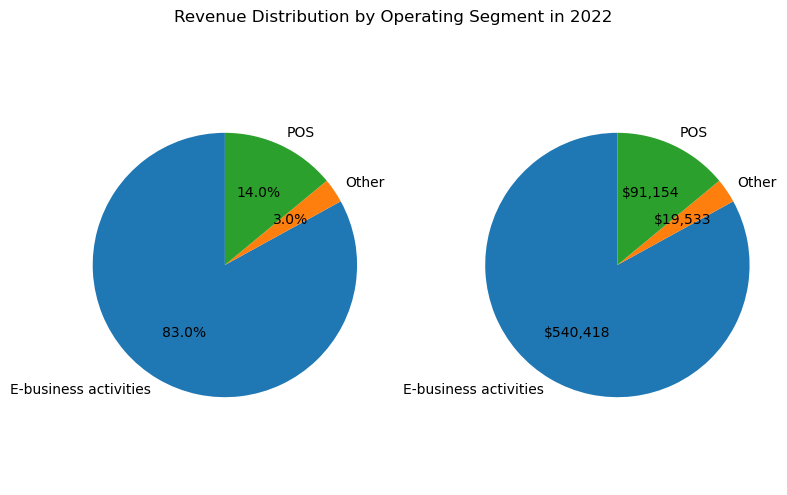

In [9]:
fig, ax = plt.subplots(1,2,figsize=(8, 5))

# plt.subplot(1,2,1)
# plt.pie(percentage,labels=labels,autopct='%1.1f%%',startangle=90)
# plt.axis('equal')

# plt.subplot(1,2,2)
# plt.pie(revenue,labels=labels,autopct=lambda pct: autopct_func(pct, revenue),startangle=90)
# plt.axis('equal')

ax[0].pie(percentage, labels=labels, autopct='%1.1f%%', startangle=90)
ax[0].axis('equal')  # Ensures the pie chart is circular

ax[1].pie(revenue, labels=labels, autopct=lambda pct: autopct_func(pct, revenue), startangle=90)
ax[1].axis('equal')  # Ensures the pie chart is circular

plt.suptitle('Revenue Distribution by Operating Segment in 2022')
plt.tight_layout()
plt.show()

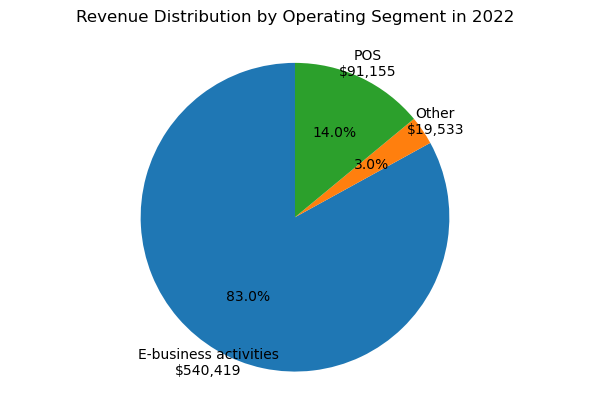

In [10]:
labels = [f"{segment}\n${revenue:,.0f}" for segment, revenue in zip(filter_df['Operating_Segment'], filter_df['Revenue'])]

plt.figure(figsize=(6,4))
plt.pie(percentage,labels=labels, autopct='%1.1f%%', startangle=90,textprops={'ha': 'center'})
plt.axis('equal')

plt.suptitle('Revenue Distribution by Operating Segment in 2022')
plt.tight_layout()
plt.show()